In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib
from scipy.spatial import distance
from mpl_toolkits import mplot3d
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import time

In [4]:
data=pd.read_csv(r"D:\Aadesh\MSC\Dataset\SocialNetworkAds.csv")

In [5]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
for i in range(len(data["Age"])):
    if data.loc[i,"Gender"]=="Male":
        data.loc[i,"Gender"]=1
    else:
        data.loc[i,"Gender"]=0


In [7]:
data.drop("User ID",axis=1,inplace=True)

In [8]:
x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled)
data.columns =['Gender', 'Age','EstimatedSalary','Purchased']

In [9]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1.0,0.023810,0.029630,0.0
1,1.0,0.404762,0.037037,0.0
2,0.0,0.190476,0.207407,0.0
3,0.0,0.214286,0.311111,0.0
4,1.0,0.023810,0.451852,0.0


In [10]:
data.shape

(400, 4)

In [11]:
data["Purchased"].unique()

array([0., 1.])

In [12]:
y=data["Purchased"]
x=data.drop("Purchased",axis=1)

In [13]:
x

,Gender,Age,EstimatedSalary
0,1.0,0.023810,0.029630
1,1.0,0.404762,0.037037
2,0.0,0.190476,0.207407
3,0.0,0.214286,0.311111
4,1.0,0.023810,0.451852
...,...,...,...
395,0.0,0.666667,0.192593
396,1.0,0.785714,0.059259
397,0.0,0.761905,0.037037
398,1.0,0.428571,0.133333


In [14]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Purchased, Length: 400, dtype: float64

# Whole dataset

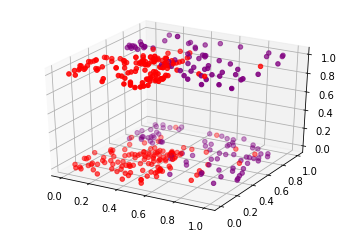

In [15]:
colors = ['red','green','blue','purple']
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x["EstimatedSalary"],x["Age"],x["Gender"],c=y,cmap=matplotlib.colors.ListedColormap(colors))

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=1)

# Training Dataset

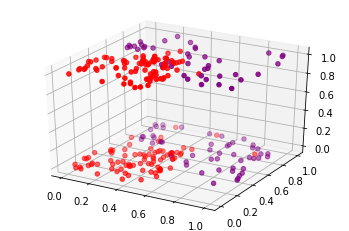

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(xtrain["EstimatedSalary"],xtrain["Age"],xtrain["Gender"],c=ytrain,cmap=matplotlib.colors.ListedColormap(colors))

# Testing dataset

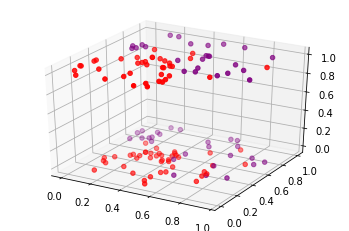

In [18]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(xtest["EstimatedSalary"],xtest["Age"],xtest["Gender"],c=ytest,cmap=matplotlib.colors.ListedColormap(colors))

# KNN

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=1)

In [42]:
k=[]
accuracy=[]

0.015625


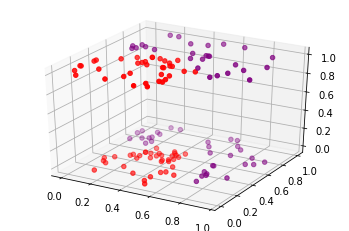

In [45]:
start = time.process_time()
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(xtrain,ytrain)
ypre3=neigh.predict(xtest)
print(time.process_time() - start)
a3=accuracy_score(ytest,ypre3)
k.append(3)
accuracy.append(a3)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(xtest["EstimatedSalary"],xtest["Age"],xtest["Gender"],c=ypre3,cmap=matplotlib.colors.ListedColormap(colors))

In [47]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(xtrain,ytrain)
ypre5=neigh.predict(xtest)
a5=accuracy_score(ytest,ypre5)
k.append(5)
accuracy.append(a5)

In [48]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(xtrain,ytrain)
ypre7=neigh.predict(xtest)
a7=accuracy_score(ytest,ypre7)
k.append(7)
accuracy.append(a7)

In [49]:
neigh = KNeighborsClassifier(n_neighbors=13)
neigh.fit(xtrain,ytrain)
ypre13=neigh.predict(xtest)
a13=accuracy_score(ytest,ypre13)
k.append(13)
accuracy.append(a13)

In [50]:
neigh = KNeighborsClassifier(n_neighbors=17)
neigh.fit(xtrain,ytrain)
ypre17=neigh.predict(xtest)
a17=accuracy_score(ytest,ypre17)
k.append(17)
accuracy.append(a17)

In [51]:
neigh = KNeighborsClassifier(n_neighbors=27)
neigh.fit(xtrain,ytrain)
ypre27=neigh.predict(xtest)
a27=accuracy_score(ytest,ypre27)
k.append(27)
accuracy.append(a27)

In [52]:
neigh = KNeighborsClassifier(n_neighbors=37)
neigh.fit(xtrain,ytrain)
ypre37=neigh.predict(xtest)
a37=accuracy_score(ytest,ypre37)
k.append(37)
accuracy.append(a37)

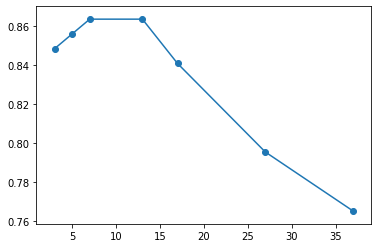

In [53]:
plt.plot(k,accuracy)
plt.scatter(k,accuracy)

In [54]:
accuracy

[0.8484848484848485,
 0.8560606060606061,
 0.8636363636363636,
 0.8636363636363636,
 0.8409090909090909,
 0.7954545454545454,
 0.7651515151515151]

In [55]:
k

[3, 5, 7, 13, 17, 27, 37]